# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [14]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [15]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [16]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

Matplotlib(Figure)
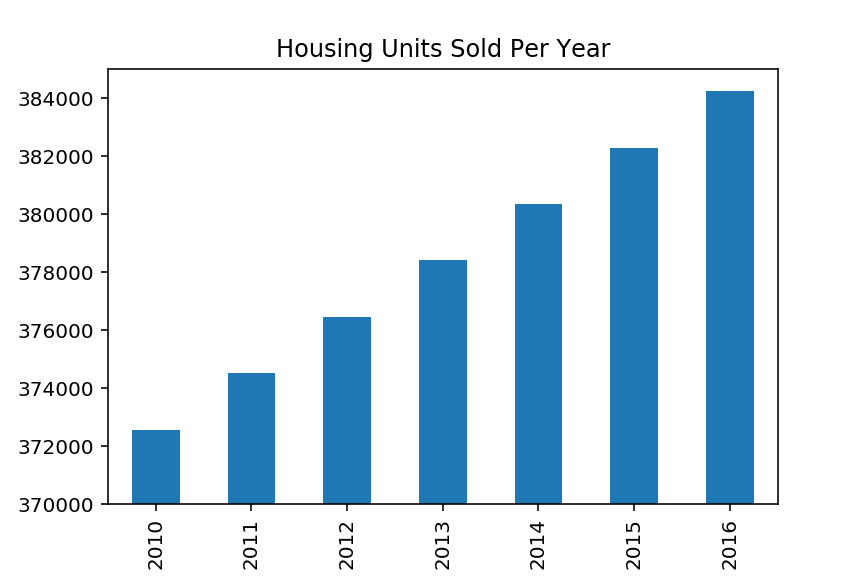

In [17]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
housing_units_per_year = sfo_data["housing_units"]
housing_units_per_year = housing_units_per_year.groupby([sfo_data.index]).mean()    
housing_units_per_year_fig = plt.figure()
housing_units__per_year_plot = housing_units_per_year.plot.bar(x='year', ylim=[370000, 385000], title="Housing Units Sold Per Year")
plt.close(housing_units_per_year_fig)
return pn.pane.Matplotlib(housing_units_per_year_fig)

In [18]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""

      # YOUR CODE HERE!
    
average_gross_rent = pd.DataFrame(sfo_data.groupby(['year']).mean()['gross_rent'])
    
average_gross_rent_plot = average_gross_rent.hvplot(figsize=(10, 10), title ='Average Gross Rent per Year')   
   
return average_gross_rent_plot

:Curve   [year]   (gross_rent)

In [19]:
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!

average_sales_price_per_year = pd.DataFrame(sfo_data.groupby(['year']).mean()['sale_price_sqr_foot'])
    
average_sales_price_per_year_plot = average_sales_price_per_year.hvplot(figsize=(10, 10),title='Average Sales Price Per Year' )
        
return average_sales_price_per_year_plot

:Curve   [year]   (sale_price_sqr_foot)

In [20]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
average_price_by_neighborhood = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
average_price_by_neighborhood.reset_index(inplace=True)
average_price_by_neighborhood.rename(columns={"level_0": "year"}, inplace=True)
average_price_by_neighborhood_plot = average_price_by_neighborhood.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",)
    
return average_price_by_neighborhood_plot



:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [21]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # YOUR CODE HERE!
top_most_expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
top_most_expensive_neighborhoods = top_most_expensive_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
top_most_expensive_neighborhoods = top_most_expensive_neighborhoods.reset_index()
top_most_expensive_neighborhoods
    
    
top_most_expensive_neighborhoods_plot = top_most_expensive_neighborhoods.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    title="Top 10 Expensive Neighborhoods in San Francisco",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    height=400,
    rot=90)
    
return top_most_expensive_neighborhoods_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [22]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!
df_parralel_coordinates = sfo_data.groupby(by="neighborhood").mean()
df_parralel_coordinates = df_parralel_coordinates.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
df_parralel_coordinates = df_parralel_coordinates.reset_index()
df_parralel_coordinates
   
parallel_coordinates_plot = px.parallel_coordinates(
    df_parralel_coordinates,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title='Average Values by Neighborhood',
    labels={'neighborhood': "Neighborhood", 
            'sale_price_sqr_foot':'Sales Price per sqf',
           'housing_units':'Housing Units',
           'gross_rent':'Gross rent'},)
    
return parallel_coordinates_plot
  


In [23]:
def parallel_categories():
    """Parallel Categories Plot."""
    
     # YOUR CODE HERE!
df_parallel_categories = sfo_data.groupby(by="neighborhood").mean()
df_parallel_categories = df_parallel_categories.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
df_parallel_categories = df_parallel_categories.reset_index()
df_parallel_categories
    
parallel_categories_plot = px.parallel_categories(
    df_parallel_categories,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title='Average values per neighborhood',
    labels={'neighborhood': "Neighborhood", 
            'sale_price_sqr_foot':'Sales Price per sqf',
           'housing_units':'Housing Units',
           'gross_rent':'Gross rent'},) 
       
    
return parallel_categories_plot

In [24]:
def neighborhood_map():
    """Neighborhood Map"""
    
    # YOUR CODE HERE!
    
df_neighborhoods_map = sfo_data.groupby(by="neighborhood").mean()
df_neighborhoods_map = df_neighborhoods_map.sort_values(by="sale_price_sqr_foot", ascending=False)
df_neighborhoods_map = df_neighborhoods_map.reset_index()
df_concat_neighborhoods=pd.concat([df_neighborhood_locations,
                                df_neighborhoods_map['sale_price_sqr_foot'],
                                df_neighborhoods_map['housing_units'],
                                df_neighborhoods_map['gross_rent']
                               ], axis=1).dropna()
    
    
px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(
        df_concat_neighborhoods,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=11,
        hover_name="Neighborhood",
        title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
        width=960,
        height=600
    )
plotly_panel = pn.pane.Plotly(map)
plotly_panel._updates = True
return plotly_panel

Plotly(Figure)

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [25]:
# YOUR CODE HERE!

# Create tabs
SF_dashboard = pn.Tabs(
    ("Neighborhood Map", map), ("Parallel Categories Plot", parallel_categories_plot), ("Parallel Coordinates Plot",parallel_coordinates_plot), ("10 Most Expensive Neighborhoods", top_most_expensive_neighborhoods_plot), ("Average Price by Neighborhood",average_price_by_neighborhood_plot), ("Average Sales Price per Year", average_sales_price_per_year_plot), ("Average Gross Rent per Year", average_sales_price_per_year_plot), ("Housing Units Sold per Year", pn.pane.Matplotlib(housing_units_per_year_fig))
)



## Serve the Panel Dashboard

Tabs
    [0] Plotly(Figure, name='Neighborhood Map')
    [1] Plotly(Figure, name='Parallel Categories P...)
    [2] Plotly(Figure, name='Parallel Coordinates P...)
    [3] HoloViews(Bars, name='10 Most Expensive N...)
    [4] Row(name='Average Price b...)
        [0] HoloViews(DynamicMap, name='Average Price b...)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()
    [5] HoloViews(Curve, name='Average Sales P...)
    [6] HoloViews(Curve, name='Average Gross R...)
    [7] Matplotlib(Figure)
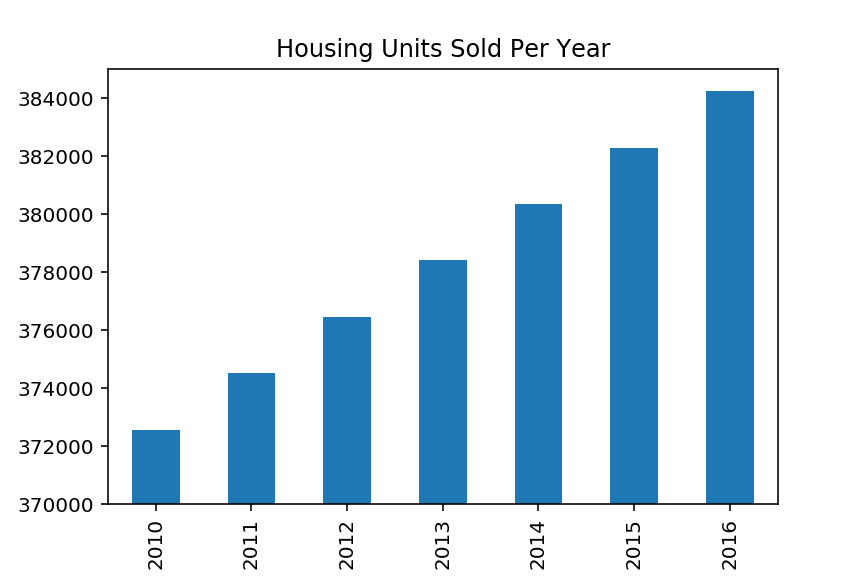

In [26]:
SF_dashboard.servable()